In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
import contextily as cx
from statsmodels.multivariate.manova import MANOVA
from sklearn.datasets import load_iris
import shap
shap.initjs()

In [18]:
df = gpd.read_file('/Users/hassanykb/Desktop/uf/UF_improved.shp')

In [19]:
df.head(5)

,id,left,top,right,bottom,row_index,col_index,id_2,left_2,top_2,...,Z_tourism,Z_amenity,Z_shop,Z_office,Accessibil,Intersecti,Build_heig,B_volume,Pop_dens,geometry
0,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,0.0,0.0,0.0,0.0,0.0,18.0,2.9,1296.0,NaN,"POLYGON ((775654.885 630960.811, 775690.407 63..."
1,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,0.0,0.0,0.0,0.0,0.0,18.0,2.5,1296.0,NaN,"POLYGON ((775654.885 630960.811, 775690.407 63..."
2,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,5204.0,775690.406811,630951.297416,...,0.0,0.0,0.0,0.0,0.0,18.0,2.5,2795.0,8.7322,"POLYGON ((775654.885 630960.811, 775690.407 63..."
3,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,5204.0,775690.406811,630951.297416,...,0.0,0.0,0.0,0.0,0.0,18.0,2.0,2795.0,8.7322,"POLYGON ((775654.885 630960.811, 775690.407 63..."
4,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,0.0,0.0,0.0,0.0,0.0,18.0,2.9,930.0,NaN,"POLYGON ((775654.885 630960.811, 775690.407 63..."


In [20]:
form_data = df.copy()

In [21]:
form_data['Num_Build'].fillna(form_data['Num_Build'].mean(), inplace=True)
form_data['Accessibil'].fillna(form_data['Accessibil'].mean(), inplace=True)
form_data['Intersecti'].fillna(form_data['Intersecti'].mean(), inplace=True)
form_data['Build_heig'].fillna(form_data['Build_heig'].mean(), inplace=True)
form_data['B_volume'].fillna(form_data['B_volume'].mean(), inplace=True)
form_data['Pop_dens'].fillna(form_data['Pop_dens'].mean(), inplace=True)

/var/folders/cw/vf_fp5n903583g210d5l24180000gn/T/ipykernel_17647/1827650331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  form_data['Num_Build'].fillna(form_data['Num_Build'].mean(), inplace=True)
/var/folders/cw/vf_fp5n903583g210d5l24180000gn/T/ipykernel_17647/1827650331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [22]:
scaler = StandardScaler()

In [23]:
form_data[['Num_Build_T','Accessibil_T','Intersecti_T','Build_heig_T','B_volume_T','Pop_dens_T']] = scaler.fit_transform(form_data[['Num_Build','Accessibil','Intersecti','Build_heig','B_volume','Pop_dens']])

In [24]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=6)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

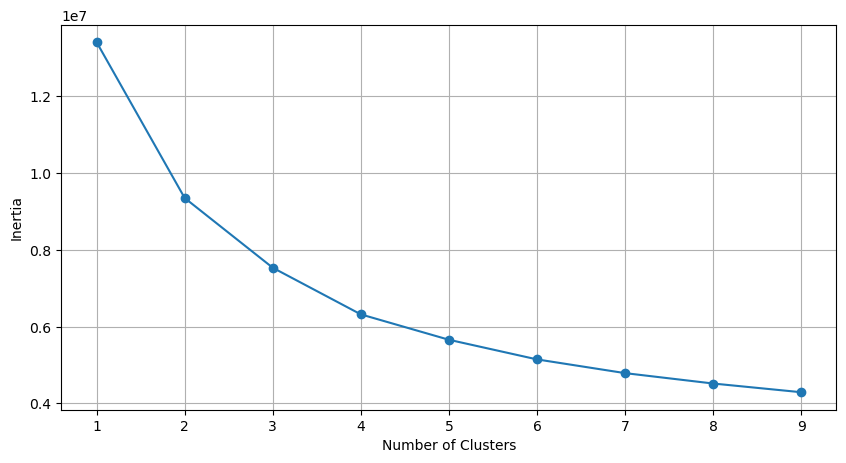

In [25]:
optimise_k_means(form_data[['Num_Build_T','Accessibil_T','Intersecti_T','Build_heig_T','B_volume_T','Pop_dens_T']], 10)

In [26]:
kmeans = KMeans(n_clusters=4)

In [27]:
kmeans.fit(form_data[['Num_Build_T','Accessibil_T','Intersecti_T','Build_heig_T','B_volume_T', 'Pop_dens_T']])

/Users/hassanykb/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [28]:
form_data['kmeans_4'] = kmeans.labels_

<Axes: xlabel='kmeans_4', ylabel='kmeans_4'>

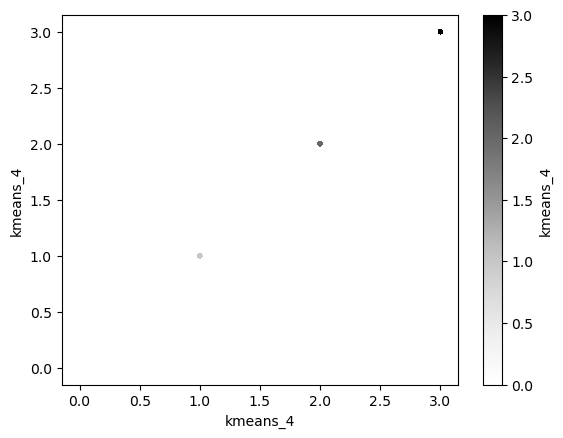

In [29]:
form_data.plot.scatter(x = 'kmeans_4', y = 'kmeans_4', s = 5, c='kmeans_4')

In [30]:
form_data.head(5)

,id,left,top,right,bottom,row_index,col_index,id_2,left_2,top_2,...,B_volume,Pop_dens,geometry,Num_Build_T,Accessibil_T,Intersecti_T,Build_heig_T,B_volume_T,Pop_dens_T,kmeans_4
0,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,1296.0,44.859753,"POLYGON ((775654.885 630960.811, 775690.407 63...",-1.039924,-1.214786,-1.928543,-0.411101,-0.808771,-9.392690e-16,1
1,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,1296.0,44.859753,"POLYGON ((775654.885 630960.811, 775690.407 63...",-1.039924,-1.214786,-1.928543,-0.603713,-0.808771,-9.392690e-16,1
2,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,5204.0,775690.406811,630951.297416,...,2795.0,8.732200,"POLYGON ((775654.885 630960.811, 775690.407 63...",-0.469589,-1.214786,-1.928543,-0.603713,-0.594807,-6.822449e-01,1
3,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,5204.0,775690.406811,630951.297416,...,2795.0,8.732200,"POLYGON ((775654.885 630960.811, 775690.407 63...",-0.469589,-1.214786,-1.928543,-0.844478,-0.594807,-6.822449e-01,1
4,4748.0,775590.406811,631051.297416,775690.406811,630951.297416,197.0,10.0,4749.0,775590.406811,630951.297416,...,930.0,44.859753,"POLYGON ((775654.885 630960.811, 775690.407 63...",-1.039924,-1.214786,-1.928543,-0.411101,-0.861013,-9.392690e-16,1


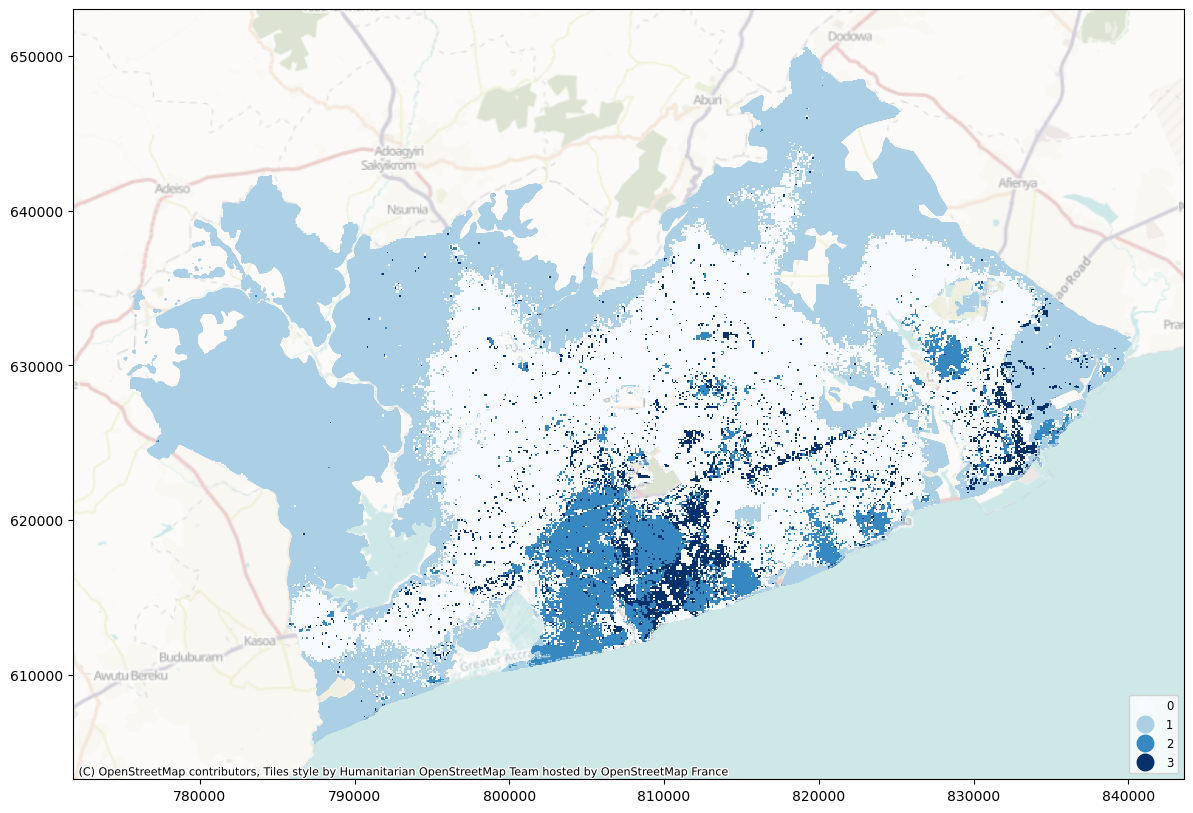

In [31]:
cluster_map = form_data.plot(column='kmeans_4',legend=True, figsize=(20, 10), categorical=True, cmap='Blues',legend_kwds={'loc':'lower right',  
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'}, )
cx.add_basemap(cluster_map, crs=form_data.crs, alpha=0.45)

In [32]:
form_data.describe()

,id,left,top,right,bottom,row_index,col_index,id_2,left_2,top_2,...,Build_heig,B_volume,Pop_dens,Num_Build_T,Accessibil_T,Intersecti_T,Build_heig_T,B_volume_T,Pop_dens_T,kmeans_4
count,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.232465e+06,2.232465e+06,2.232465e+06,...,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06
mean,1.514395e+05,8.078216e+05,6.271117e+05,8.079216e+05,6.270117e+05,2.363961e+02,3.323124e+02,1.514416e+05,8.078221e+05,6.271089e+05,...,3.753739e+00,6.962122e+03,4.485975e+01,-2.409799e-15,7.067672e-16,-3.197658e-15,2.127835e-16,-4.081575e-16,-4.671057e-16,7.145404e-01
std,6.619935e+04,1.455426e+04,8.430823e+03,1.455426e+04,8.430823e+03,8.430823e+01,1.455426e+02,6.619130e+04,1.455249e+04,8.428504e+03,...,2.076715e+00,7.005847e+03,5.295395e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.342205e-01
min,2.023000e+03,7.749904e+05,6.055513e+05,7.750904e+05,6.054513e+05,0.000000e+00,4.000000e+00,2.023000e+03,7.749904e+05,6.055513e+05,...,2.000000e-01,0.000000e+00,1.197600e+00,-1.153991e+00,-1.214786e+00,-1.934473e+00,-1.711231e+00,-9.937591e-01,-8.245308e-01,0.000000e+00
25%,9.763600e+04,7.959904e+05,6.208513e+05,7.960904e+05,6.207513e+05,1.750000e+02,2.140000e+02,9.765400e+04,7.959904e+05,6.208513e+05,...,2.700000e+00,2.683000e+03,1.517140e+01,-6.977229e-01,-6.170128e-01,-8.030893e-01,-5.074067e-01,-6.107932e-01,-5.606448e-01,0.000000e+00
50%,1.518120e+05,8.078904e+05,6.274513e+05,8.079904e+05,6.273513e+05,2.330000e+02,3.330000e+02,1.518230e+05,8.078904e+05,6.274513e+05,...,3.300000e+00,6.093000e+03,3.127960e+01,-1.844217e-01,-2.821778e-01,1.945318e-01,-2.184888e-01,-1.240568e-01,-2.564522e-01,1.000000e+00
75%,2.034040e+05,8.192904e+05,6.332513e+05,8.193904e+05,6.331513e+05,2.990000e+02,4.470000e+02,2.032680e+05,8.191904e+05,6.332513e+05,...,4.000000e+00,8.832000e+03,4.509600e+01,3.859130e-01,4.634975e-01,7.223353e-01,1.185821e-01,2.669025e-01,4.461385e-03,1.000000e+00
max,2.991250e+05,8.402904e+05,6.507513e+05,8.403904e+05,6.506513e+05,4.520000e+02,6.570000e+02,2.982200e+05,8.400904e+05,6.506513e+05,...,1.333000e+02,2.372800e+05,8.886430e+02,1.869366e+01,4.171332e+00,2.718895e+00,6.238040e+01,3.287510e+01,1.593429e+01,3.000000e+00


In [123]:
form_data[['Num_Build','Accessibil','Intersecti','Build_heig','B_volume','Pop_dens']].describe()

,Num_Build,Accessibil,Intersecti,Build_heig,B_volume,Pop_dens
count,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06,2.233307e+06
mean,2.023357e+01,1.182732e+00,5.871553e+03,3.753739e+00,6.962122e+03,4.485975e+01
std,1.753357e+01,9.736143e-01,3.035221e+03,2.076715e+00,7.005847e+03,5.295395e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,0.000000e+00,1.197600e+00
25%,8.000000e+00,5.820000e-01,3.434000e+03,2.700000e+00,2.683000e+03,1.517140e+01
50%,1.700000e+01,9.080000e-01,6.462000e+03,3.300000e+00,6.093000e+03,3.127960e+01
75%,2.700000e+01,1.634000e+00,8.064000e+03,4.000000e+00,8.832000e+03,4.509600e+01
max,3.480000e+02,5.244000e+00,1.412400e+04,1.333000e+02,2.372800e+05,8.886430e+02


In [33]:
form_data['kmeans_4'].describe()

count    2.233307e+06
mean     7.145404e-01
std      8.342205e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: kmeans_4, dtype: float64

In [34]:
form_data.groupby('kmeans_4')['kmeans_4'].count()

kmeans_4
0    1066218
1     859030
2     187419
3     120640
Name: kmeans_4, dtype: int64

In [35]:
form_data.groupby('kmeans_4')['kmeans_4'].min()

kmeans_4
0    0
1    1
2    2
3    3
Name: kmeans_4, dtype: int32

<Axes: title={'center': 'Num_Build_T'}, xlabel='kmeans_4'>

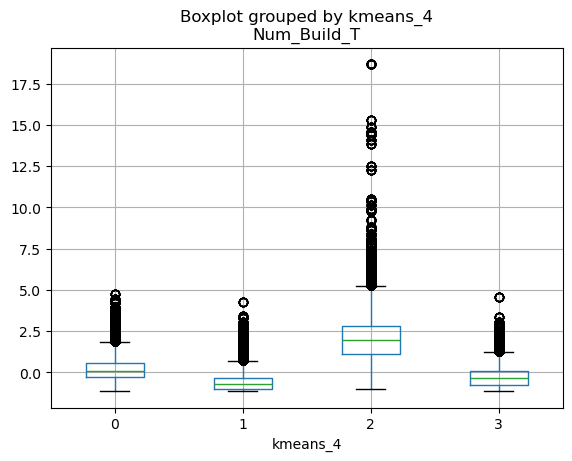

In [36]:
form_data.boxplot(by ='kmeans_4', column =['Num_Build_T'], grid = True)

<Axes: title={'center': 'Accessibil_T'}, xlabel='kmeans_4'>

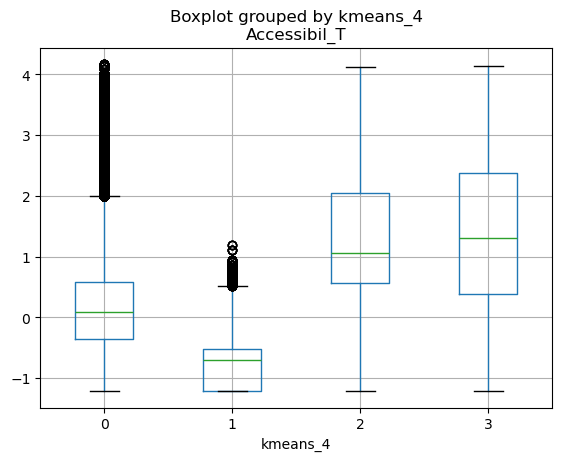

In [37]:
form_data.boxplot(by ='kmeans_4', column =['Accessibil_T'], grid = True) 

<Axes: title={'center': 'Intersecti_T'}, xlabel='kmeans_4'>

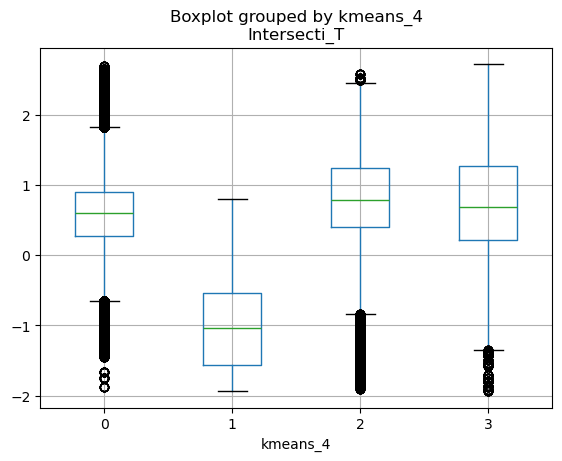

In [38]:
form_data.boxplot(by ='kmeans_4', column =['Intersecti_T'], grid = True) 

<Axes: title={'center': 'Build_heig_T'}, xlabel='kmeans_4'>

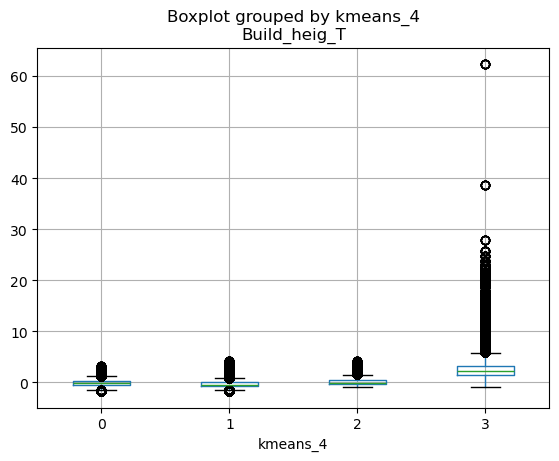

In [39]:
form_data.boxplot(by ='kmeans_4', column =['Build_heig_T'], grid = True) 

<Axes: title={'center': 'B_volume_T'}, xlabel='kmeans_4'>

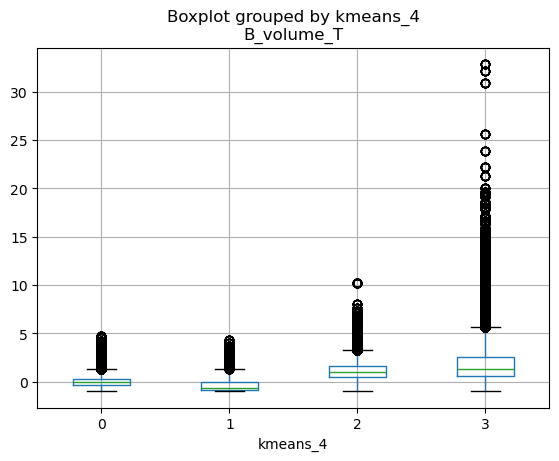

In [40]:
form_data.boxplot(by ='kmeans_4', column =['B_volume_T'], grid = True) 

<Axes: title={'center': 'Pop_dens_T'}, xlabel='kmeans_4'>

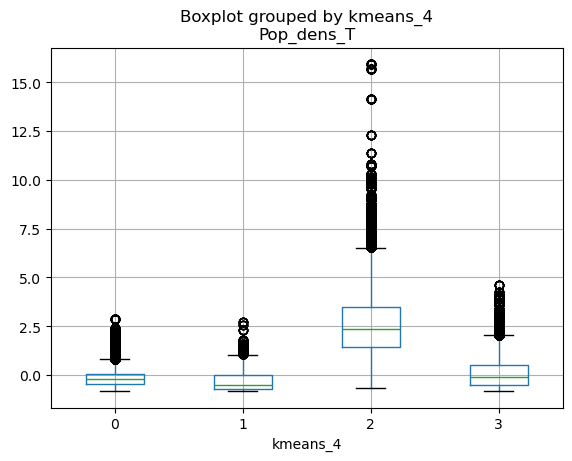

In [41]:
form_data.boxplot(by ='kmeans_4', column =['Pop_dens_T'], grid = True) 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
y = form_data['kmeans_4']
X = form_data[['Num_Build_T','Accessibil_T','Intersecti_T','Build_heig_T','B_volume_T','Pop_dens_T']]

In [44]:
X.head()

,Num_Build_T,Accessibil_T,Intersecti_T,Build_heig_T,B_volume_T,Pop_dens_T
0,-1.039924,-1.214786,-1.928543,-0.411101,-0.808771,-9.392690e-16
1,-1.039924,-1.214786,-1.928543,-0.603713,-0.808771,-9.392690e-16
2,-0.469589,-1.214786,-1.928543,-0.603713,-0.594807,-6.822449e-01
3,-0.469589,-1.214786,-1.928543,-0.844478,-0.594807,-6.822449e-01
4,-1.039924,-1.214786,-1.928543,-0.411101,-0.861013,-9.392690e-16


Test for group differences - to see if the clusters are well demarcated

In [144]:
manova = MANOVA(endog=X,
                exog=y)
result = manova.mv_test()
print(result.summary())

                      Multivariate linear model
                                                                     
---------------------------------------------------------------------
           x0           Value  Num DF    Den DF      F Value   Pr > F
---------------------------------------------------------------------
          Wilks' lambda 0.7650 6.0000 2233301.0000 114341.8480 0.0000
         Pillai's trace 0.2350 6.0000 2233301.0000 114341.8480 0.0000
 Hotelling-Lawley trace 0.3072 6.0000 2233301.0000 114341.8480 0.0000
    Roy's greatest root 0.3072 6.0000 2233301.0000 114341.8480 0.0000



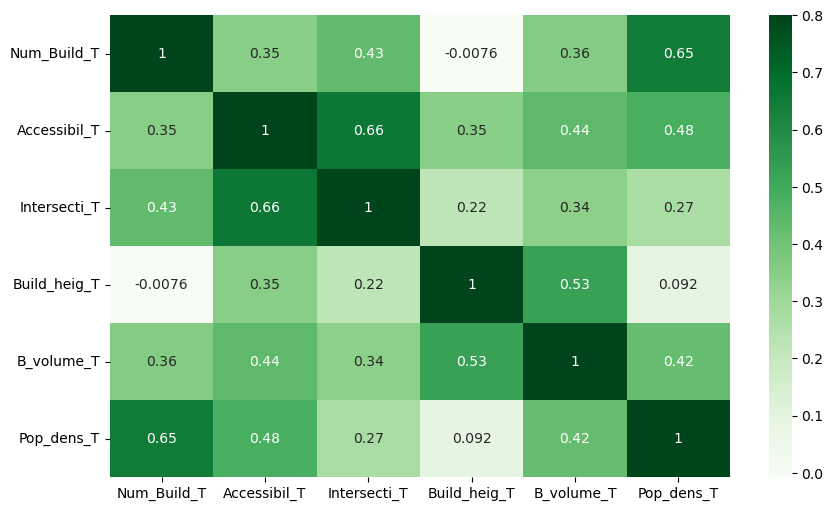

In [45]:
plt.figure(figsize=(10, 6))
cmap = sns.diverging_palette(222, 10, as_cmap=True)
_ = sns.heatmap(X.corr(), annot=True, vmax=.8, square=False, cmap='Greens')

In [206]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

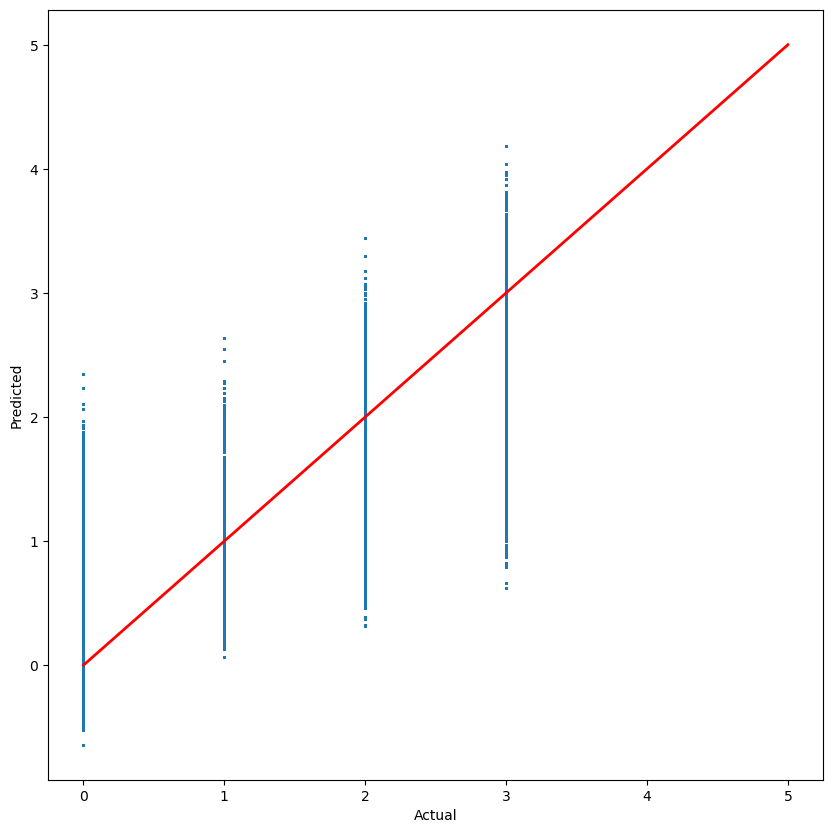

In [208]:
y_pred = model.predict(X)

plt.figure(figsize=(10,10))

plt.scatter(y, y_pred, s=1)
plt.plot([0,5], [0,5], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted')
plt.xlabel('Actual')

In [210]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [212]:
np.shape(shap_values.values)

(2233307, 6)

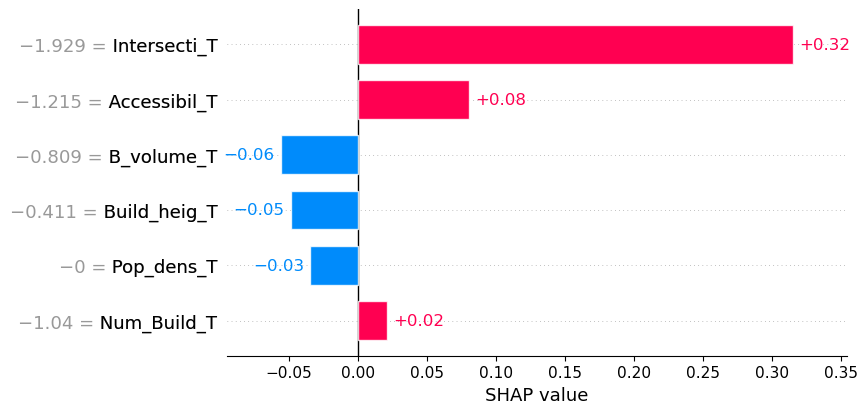

In [214]:
shap.plots.bar(shap_values[0])

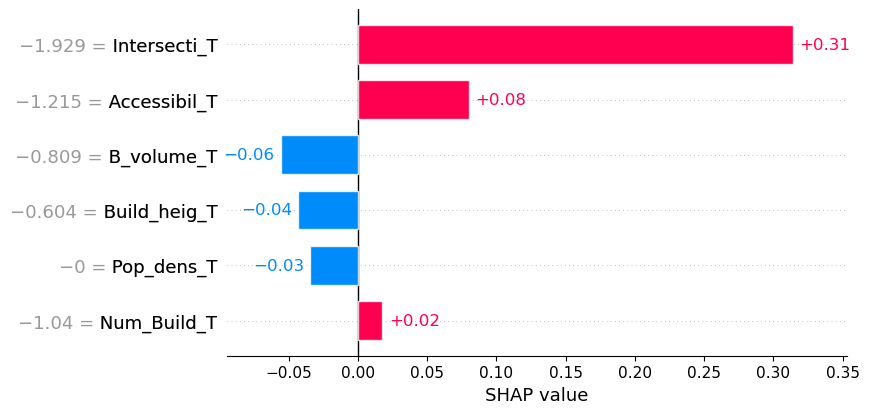

In [216]:
shap.plots.bar(shap_values[1])

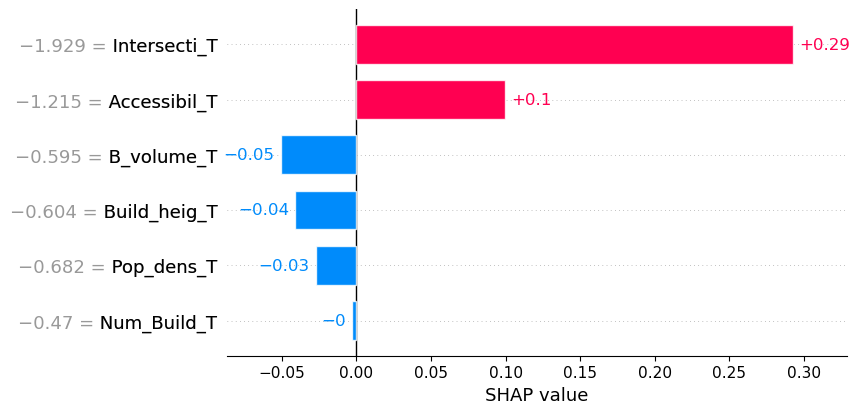

In [218]:
shap.plots.bar(shap_values[2])

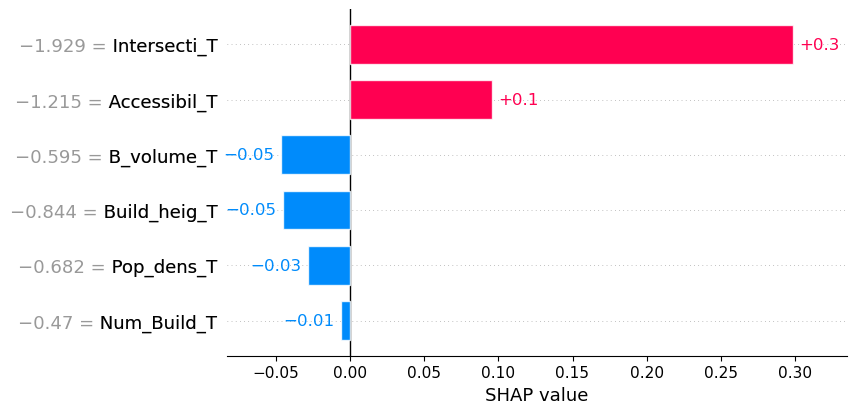

In [220]:
shap.plots.bar(shap_values[3])

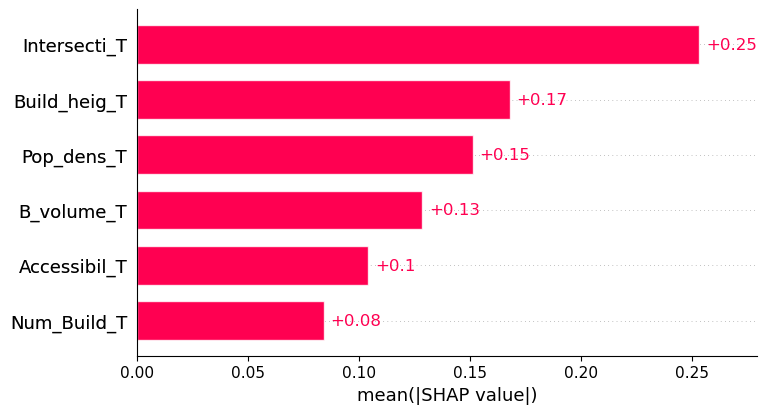

In [222]:
shap.plots.bar(shap_values)

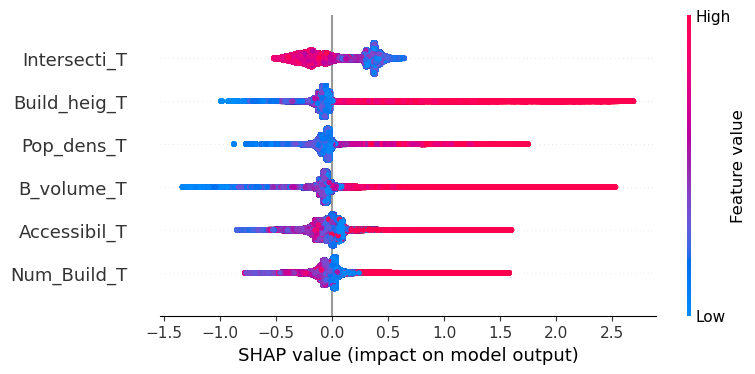

In [224]:
shap.plots.beeswarm(shap_values)

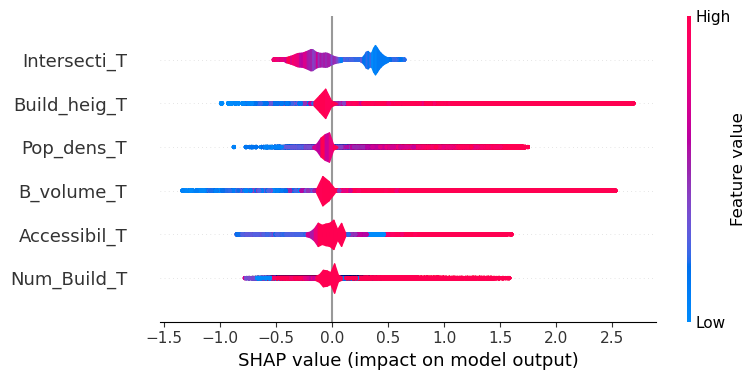

In [97]:
shap.summary_plot(shap_values, plot_type='violin')